In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/dataset-negara/Country-data.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [2]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df=df.rename(columns={'country':'negara','child_mort':'kematian_anak','exports':'ekspor','health':'kesehatan','imports':'impor','income':'pendapatan','inflation':'inflasi','life_expec':'harapan_hidup','total_fer':'fer','gdpp':'gdpp'})

In [4]:
df.head()

,negara,kematian_anak,ekspor,kesehatan,impor,pendapatan,inflasi,harapan_hidup,fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
X=df.drop(['negara','harapan_hidup'], axis=1)
X.head()

,kematian_anak,ekspor,kesehatan,impor,pendapatan,inflasi,fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,2.13,12200


In [6]:
from sklearn.cluster import KMeans
clusters=[]
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Inertia')

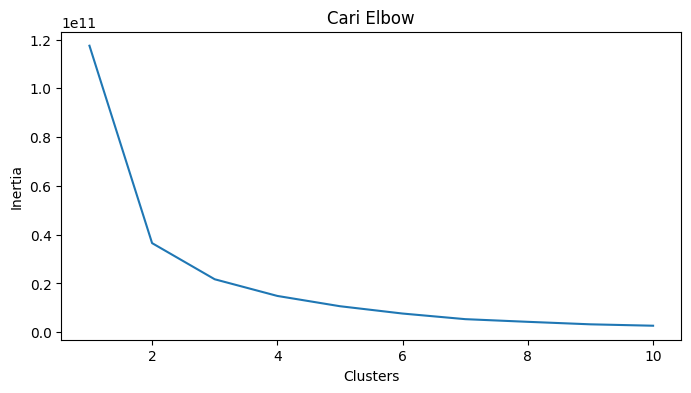

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,ax=plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [8]:
km5=KMeans(n_clusters=5).fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
X['Labels']=km5.labels_

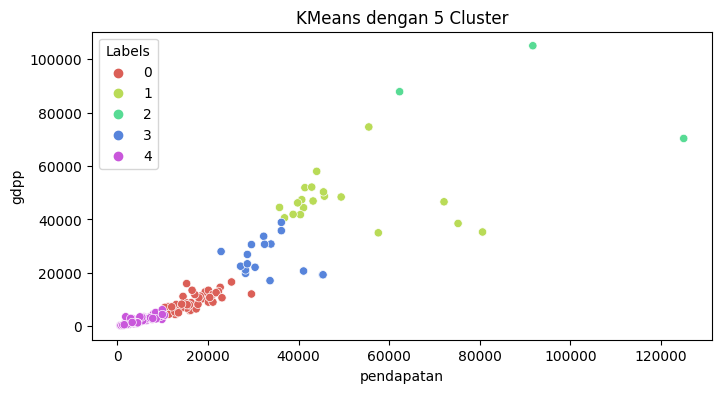

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['pendapatan'],y=X['gdpp'],hue=X['Labels'],
               palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')
plt.show()